In [1]:
import random 
import matplotlib.pyplot as plt

def load_dataset(dataset): # process the dataset
    new_data = []
    for i in range(len(dataset)):
        ex, attributes = dataset[i].split(" ", 1)
        new_data.append(attributes)
    return new_data

def change_type(dataset): # change string to int
    int_data = list()
    for i in range(len(dataset)):
        Object = []
        for a in range(len(dataset[i])):
                if dataset[i][a]=="1":
                    Object.append(1)
                elif dataset[i][a]=="0":
                    Object.append(0)
        int_data.append(Object)
    return int_data
def process_label(row): # determine if the object is positive or not (numbers of 1 >= 3)
    labels = []
    for i in range(len(row)):
        num = 0
        pos = False
        count= 0
        for a in range(len(row[i])):
            if row[i][a] == "1" or row[i][a] == "0":
                count += 1
            if row[i][a]=="1":
                num = num + 1
            if num >= 3 and count <= 5:
                row[i] += "1"
                pos = True
                break
        if pos==False:
            row[i] += "0" # add the labels directly ibto dataset instead of another list
    return 0
 
def add_attributes(dataset, N):
    for row in range(len(dataset)):
        for i in range(N):
            if random.random() > 0.5:
                dataset[row] += "1"
            else:
                dataset[row] += "0"
    return dataset    

def draw_func(example_N, example_pres):
    plt.plot(example_N, example_pres, 'ro')
    plt.ylabel('Number of example-presentations')
    plt.xlabel('Number of N')
    plt.axis([0, 20, 0, 300])
    plt.show()

In [2]:
# main algorithm
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 10e-7 else 0.0

def train_weights(train, learning_rate, n_epoch):
    zero_error_epoch = 0
    weights = [0.2 for i in range(len(train[-1]))]
    record = False
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction #list indices must be integers or slices, not list
            #print(error)
            sum_error += error**2 # get the abs of -1 1 0
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] + learning_rate * error * row[i]
                
        if sum_error == 0 and record == False:
            zero_error_epoch = epoch + 1
            print("total need epochs:", zero_error_epoch)
            record = True
        #print('>epoch=%d, learning_rate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
        #print(weights[0], weights[1],weights[2] ,weights[3],weights[4], weights[5])

    return weights, zero_error_epoch * len(train) #, example_presentations

In [3]:
filename = 'hw3_dataset.txt'
f = open(filename, "r")
lines = f.readlines()
dataset = list(lines)
new_data = load_dataset(dataset)
example_pres = []

In [4]:
learning_rate = 0.2
n_epoch = 20
N = 1
add_attributes(new_data, N)
process_label(new_data)
new_int_data = change_type(new_data)

weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print("----------Leanring rate: 0.2 , N = 1----------")
print("Example-presentations:%d "% example_presentations)

total need epochs: 6
----------Leanring rate: 0.2 , N = 1----------
Example-presentations:120 


In [5]:
new_data = load_dataset(dataset) # need to reload it to prevent the data becoming larger
learning_rate = 0.2
n_epoch = 20
N = 5
add_attributes(new_data, N)
process_label(new_data)
new_int_data = change_type(new_data)

weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print("----------Leanring rate: 0.2 , N = 5----------")
print("Example-presentations:%d "% example_presentations)

total need epochs: 16
----------Leanring rate: 0.2 , N = 5----------
Example-presentations:320 


In [6]:
new_data = load_dataset(dataset) # need to reload it to prevent the data becoming larger
learning_rate = 0.2
n_epoch = 20
N = 10
add_attributes(new_data, N)
process_label(new_data)
new_int_data = change_type(new_data)

weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print("----------Leanring rate: 0.2 , N = 10----------")
print("Example-presentations:%d "% example_presentations)

total need epochs: 4
----------Leanring rate: 0.2 , N = 10----------
Example-presentations:80 


In [7]:
new_data = load_dataset(dataset) # need to reload it to prevent the data becoming larger
learning_rate = 0.2
n_epoch = 20
N = 15
add_attributes(new_data, N)
process_label(new_data)
new_int_data = change_type(new_data)

weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print("----------Leanring rate: 0.2 , N = 15----------")
print("Example-presentations:%d "% example_presentations)

total need epochs: 12
----------Leanring rate: 0.2 , N = 15----------
Example-presentations:240 


In [8]:
new_data = load_dataset(dataset) # need to reload it to prevent the data becoming larger
learning_rate = 0.2
n_epoch = 20
N = 20
add_attributes(new_data, N)
process_label(new_data)
new_int_data = change_type(new_data)

weights ,example_presentations = train_weights(new_int_data, learning_rate, n_epoch)
example_pres.append(example_presentations)
print("----------Leanring rate: 0.2 , N = 20----------")
print("Example-presentations:%d "% example_presentations)

total need epochs: 8
----------Leanring rate: 0.2 , N = 20----------
Example-presentations:160 


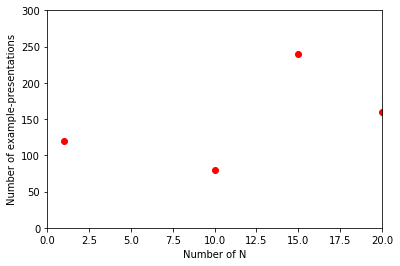

In [9]:
draw_func([1, 5, 10, 15, 20], example_pres)